In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

## Data loading

In [352]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data

#### Although in a clustering labels are unknown by definition, I will use them for testing purposes

In [353]:
y_true = iris.target
targets = iris.target_names
targets

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Create iris dataframe

In [347]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## K - means

#### K-means support functions

In [192]:
def custom_pairwise_distance(X, centers):
    # num_features
    n = X.shape[1]
    
    pariwise_distance = np.zeros([centers.shape[0], X.shape[0]])

    for idx, center in enumerate(centers):
        pariwise_distance[idx] = np.sum((center - X) ** 2, axis=1)        

    return pariwise_distance

In [198]:
def custom_pairwise_distance_argmin(X, centers):
    pariwise_distance = custom_pairwise_distance(X, centers)
    return np.argmin(pariwise_distance, axis=0)

#### K-means algorithm

In [201]:
def find_clusters(X, n_clusters=4, random_state=42):
    # num of samples
    m = X.shape[0]
    
    rng = np.random.RandomState(random_state)
    centers_idxs = rng.permutation(m)[:n_clusters]
    centers = X[centers_idxs]

    while True:
        labels = custom_pairwise_distance_argmin(X, centers)

        new_centers = np.array([
            np.mean(X[labels == i], axis=0) for i in range(n_clusters)
        ])
        
        if np.all(centers == new_centers):
            break

        centers = new_centers
    return centers, labels

#### Elbow method for finding optimal number of clusters

In [251]:
def elbow_method(X, k_range=(1, 10)):
    wsds = []
    
    range_list = range(k_range[0], k_range[1])
    
    for k in range_list:
        centers, labels = find_clusters(X, n_clusters=k)
        wsd = 0
        
        for label in labels:
            wsd += np.sum( custom_pairwise_distance( X[labels == label], centers[label]) )
    
        wsds.append(wsd)
    
    return range_list, wsds

[2396338.2599999965,
 1301625.5799999954,
 804312.3400000018,
 640267.0199999979,
 549106.500000001,
 423333.02000000095,
 352576.30000000034,
 329513.3400000002,
 314844.09999999974]

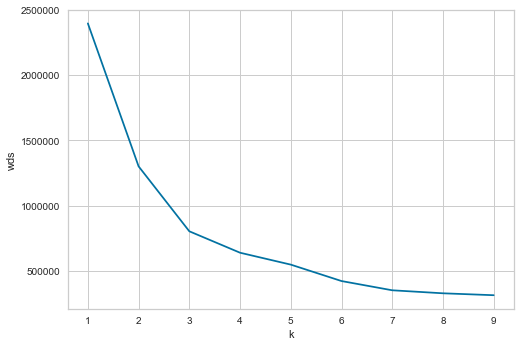

In [366]:
range_list, wsds = elbow_method(X, k_range=(1, 10))
plt.plot(range_list, wsds)
plt.xlabel("k")
plt.ylabel("wds")

wsds

#### Obviously, on the graph the bend (or the knee) is where k == 3

In [398]:
centers, labels = find_clusters(X, 3, random_state=1)

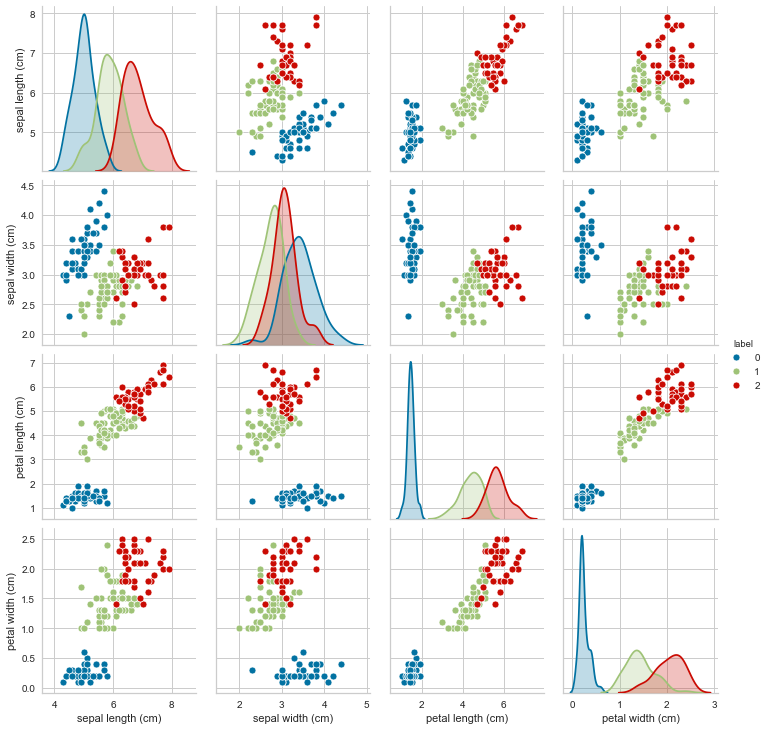

In [400]:
g = sns.pairplot(df_labels, hue="label")

#### While clustering the classes order choosing randomly and it is hard to compare them with true classes. But with random_state help I were able to do so :) 

In [406]:
print("Clusters lables: ", labels)
print("True labels: ", y_true)

Clusters lables:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
True labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [407]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, labels)

0.8866666666666667